# Developmental and genetics roots of laminar thickness covariance

In [1]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display
import helpers, datasets, surfaces, matrices

sns.set_style('ticks')


DATA_DIR = '../data/'
OUTPUT_DIR = '../output/'
SRC_DIR = '../src/'

/home/asaberi/laminar_gradients/laminar_gradients_conda/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


## a) Structural covariance

Structural covariance matrix:

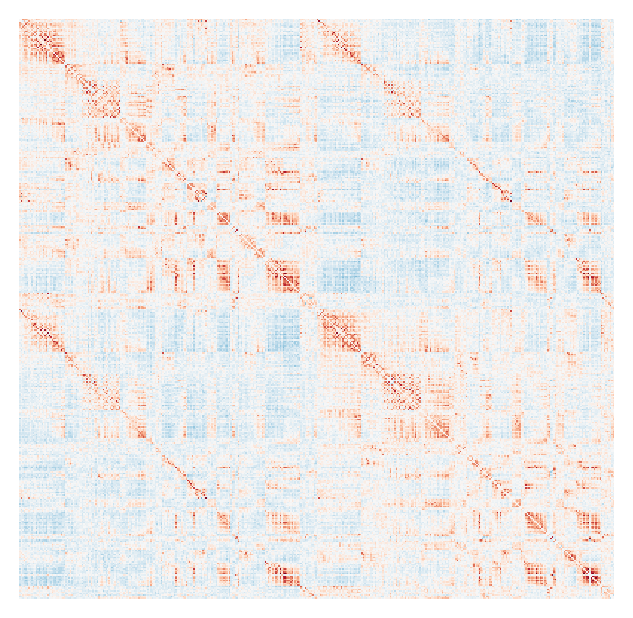

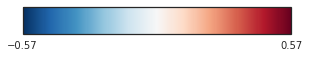

In [5]:
scov = matrices.StructuralCovarianceMatrix()
scov.plot(vrange='sym')

Correlation of LTC with structural covariance matrix:

Loading the matrix from /home/asaberi/laminar_gradients/code/../output/ltc/parc-schaefer400_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


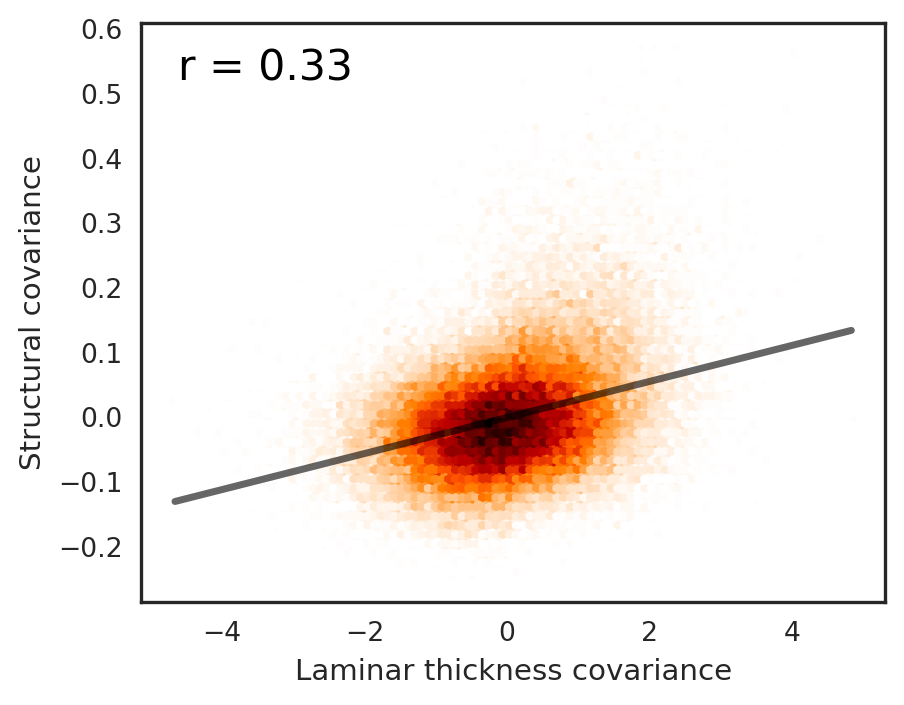

In [6]:
ltc = matrices.MicrostructuralCovarianceMatrix('thickness', 'schaefer400')
ltc.correlate_edge_wise(scov, axis_off=False, figsize=(5,4))

Mean structural covariance across bins of LTC G1:

Loading the matrix from /home/asaberi/laminar_gradients/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_gradients/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


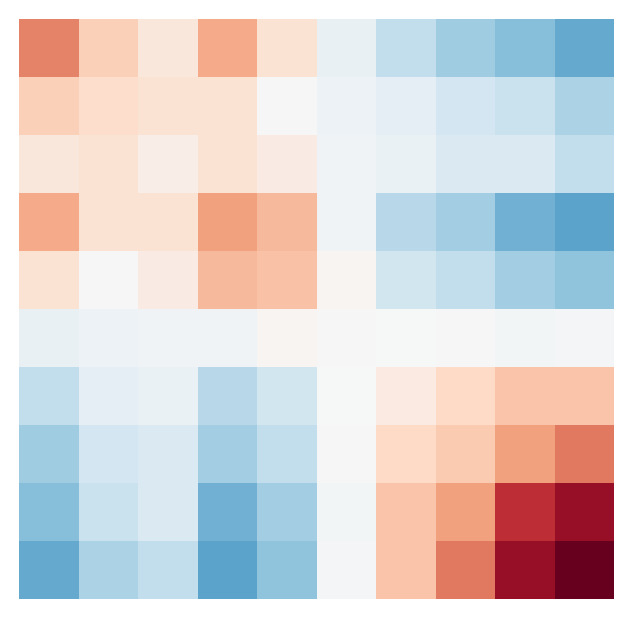

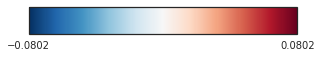

In [7]:
ltcg = surfaces.MicrostructuralCovarianceGradients(ltc)
scov_collapsed_by_ltcg1 = scov.binned_average(ltcg, 'LTC G1')
helpers.plot_matrix(scov_collapsed_by_ltcg1, cmap=scov.cmap, vrange='sym')

Principal gradient of structural covariance:

In [9]:
scovg = surfaces.Gradients(scov, n_components_report=1)

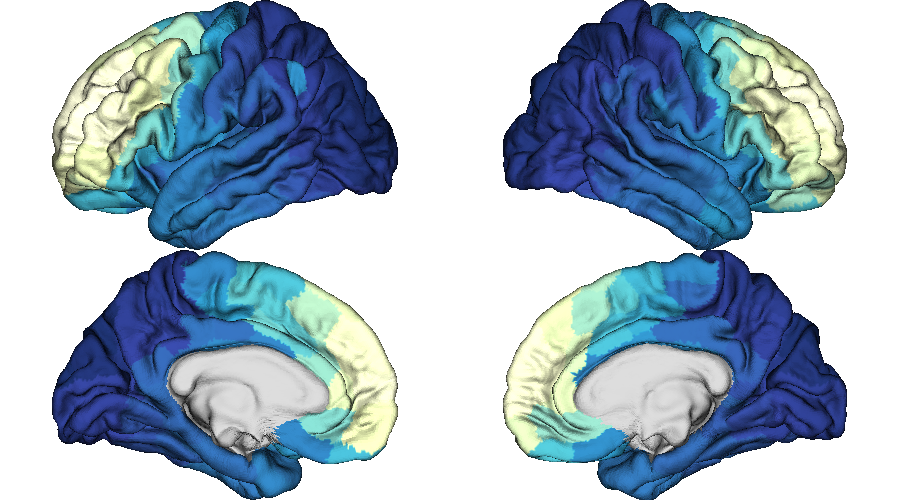

In [4]:
helpers.plot_surface(
    helpers.deparcellate(scovg.parcellated_data.iloc[:, 0], 'schaefer400', space='fsaverage'),
    cmap = 'YlGnBu_r', layout_style='grid', inflate=False,
    plot_downsampled=False, space='fsaverage'
)

Correlation of LTC G1 and the principal gradient of structrual covariance:

Calculating correlations with variogram test (parcellated)
Surrogates already exist in /home/asaberi/laminar_gradients/code/../output/ltc/parc-schaefer400_curv-smooth-10_exc-adysgranular_metric-parcor/gradients_approach-dm_kernel-normalized_angle_sparsity-09_n-10/variogram_surrogates_LTC G1_nperm-1000_nparcels-359.npz and have the same parcels


(            LTC G1
 StrCov G1 -0.56506,
            LTC G1
 StrCov G1     0.0)

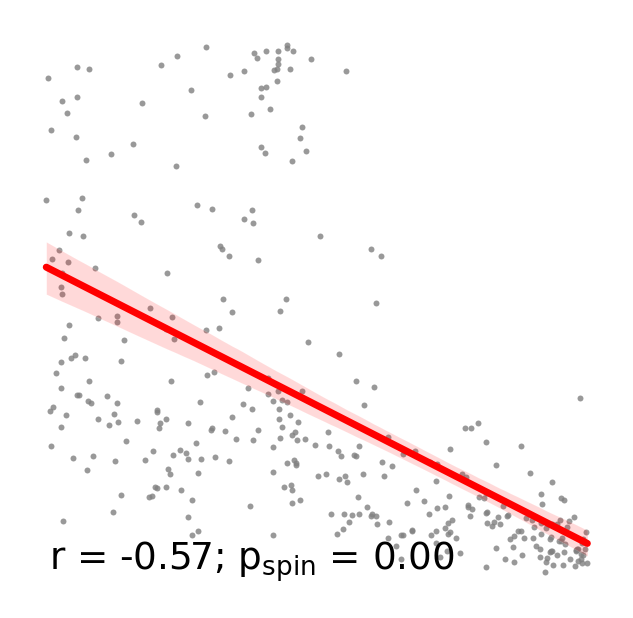

In [10]:
ltcg.correlate(scovg, x_columns=['LTC G1'], y_columns=['StrCov G1'], axis_off=True)

# b) Correlated gene expression

CGE matrix:

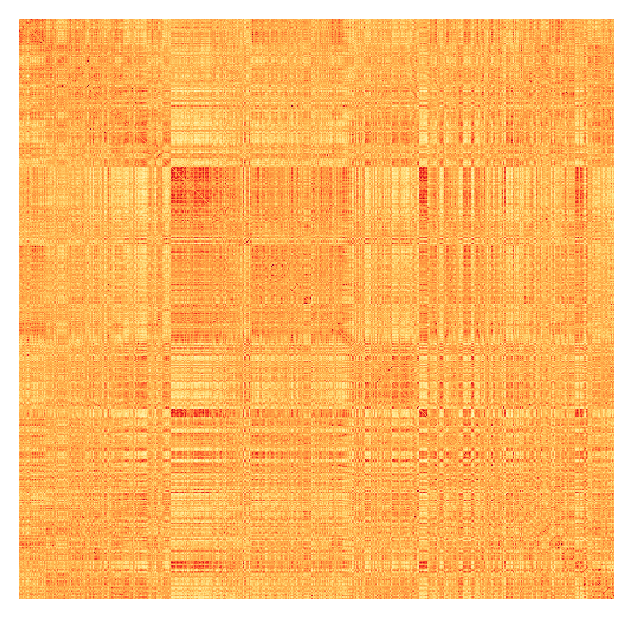

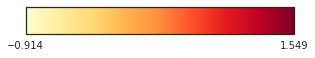

In [16]:
cge = matrices.CorrelatedGeneExpressionMatrix('sjh', brain_specific=False)
cge.plot(vrange=(0, 1))

Correlation of LTC with CGE:

Loading the matrix from /home/asaberi/laminar_gradients/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


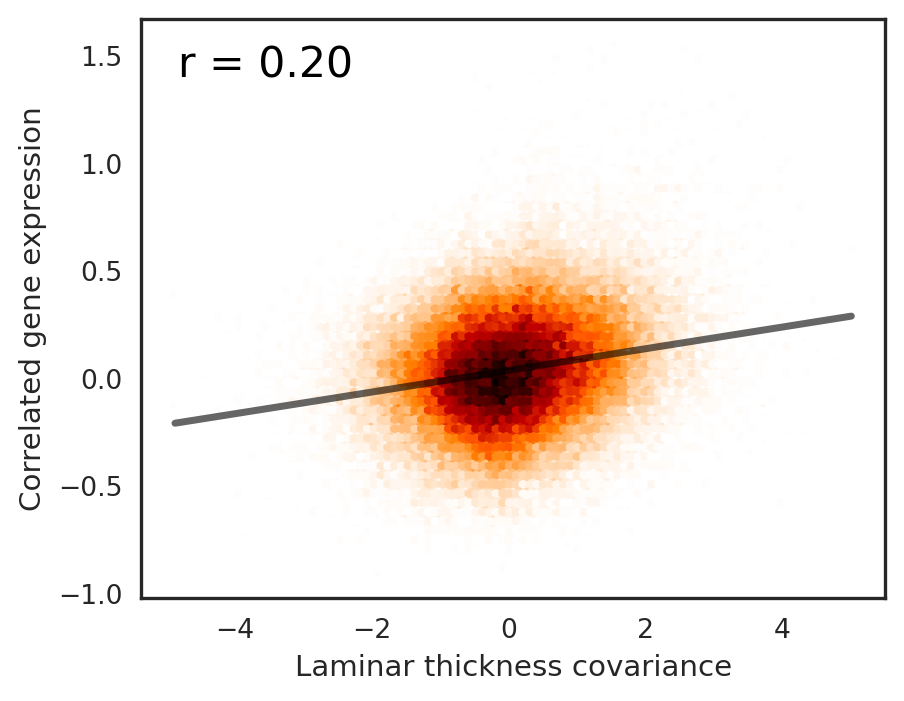

In [17]:
ltc = matrices.MicrostructuralCovarianceMatrix('thickness', 'sjh')
ltc.correlate_edge_wise(cge, axis_off=False, figsize=(5,4))

Mean CGE across LTC G1 bins:

Loading the matrix from /home/asaberi/laminar_gradients/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


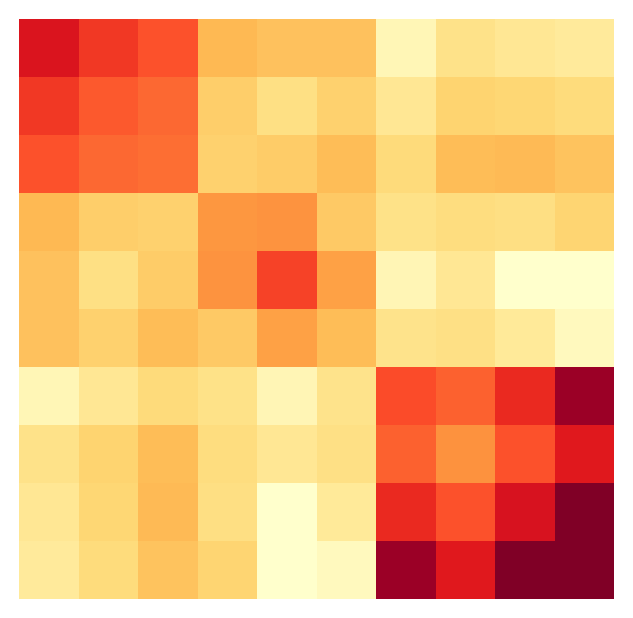

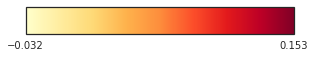

In [18]:
ltcg = surfaces.MicrostructuralCovarianceGradients(ltc)
helpers.plot_matrix(cge.binned_average(ltcg, 'LTC G1'), cmap=cge.cmap)

# c) Developmental enrichment of genes associated with LTC G1

In [2]:
ltcg = surfaces.MicrostructuralCovarianceGradients(matrices.MicrostructuralCovarianceMatrix('thickness', 'sjh'))
top_genes, pls = ltcg.ahba_pls(['LTC G1'])

Loading the matrix from /home/asaberi/laminar_gradients/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_gradients/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


0 of 233 genes do not exist


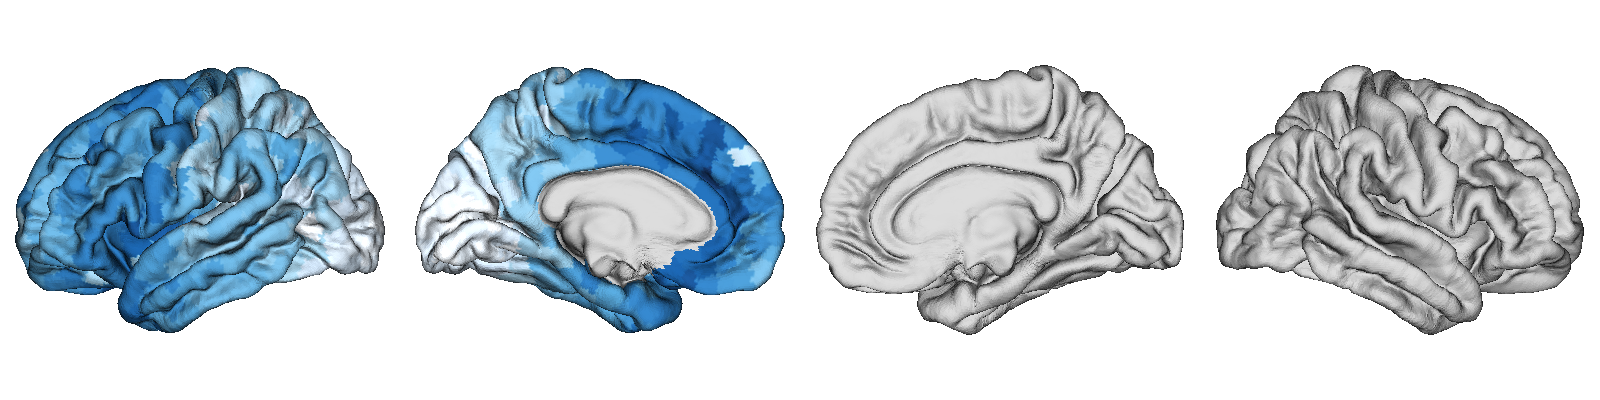

In [6]:
helpers.plot_surface(
    helpers.deparcellate(datasets.fetch_aggregate_gene_expression(top_genes[0]['pos'], 'sjh', ibf_threshold=0.5), 'sjh', space='fsaverage'),
    inflate=False, cmap='Blues', plot_downsampled=False, space='fsaverage'
)

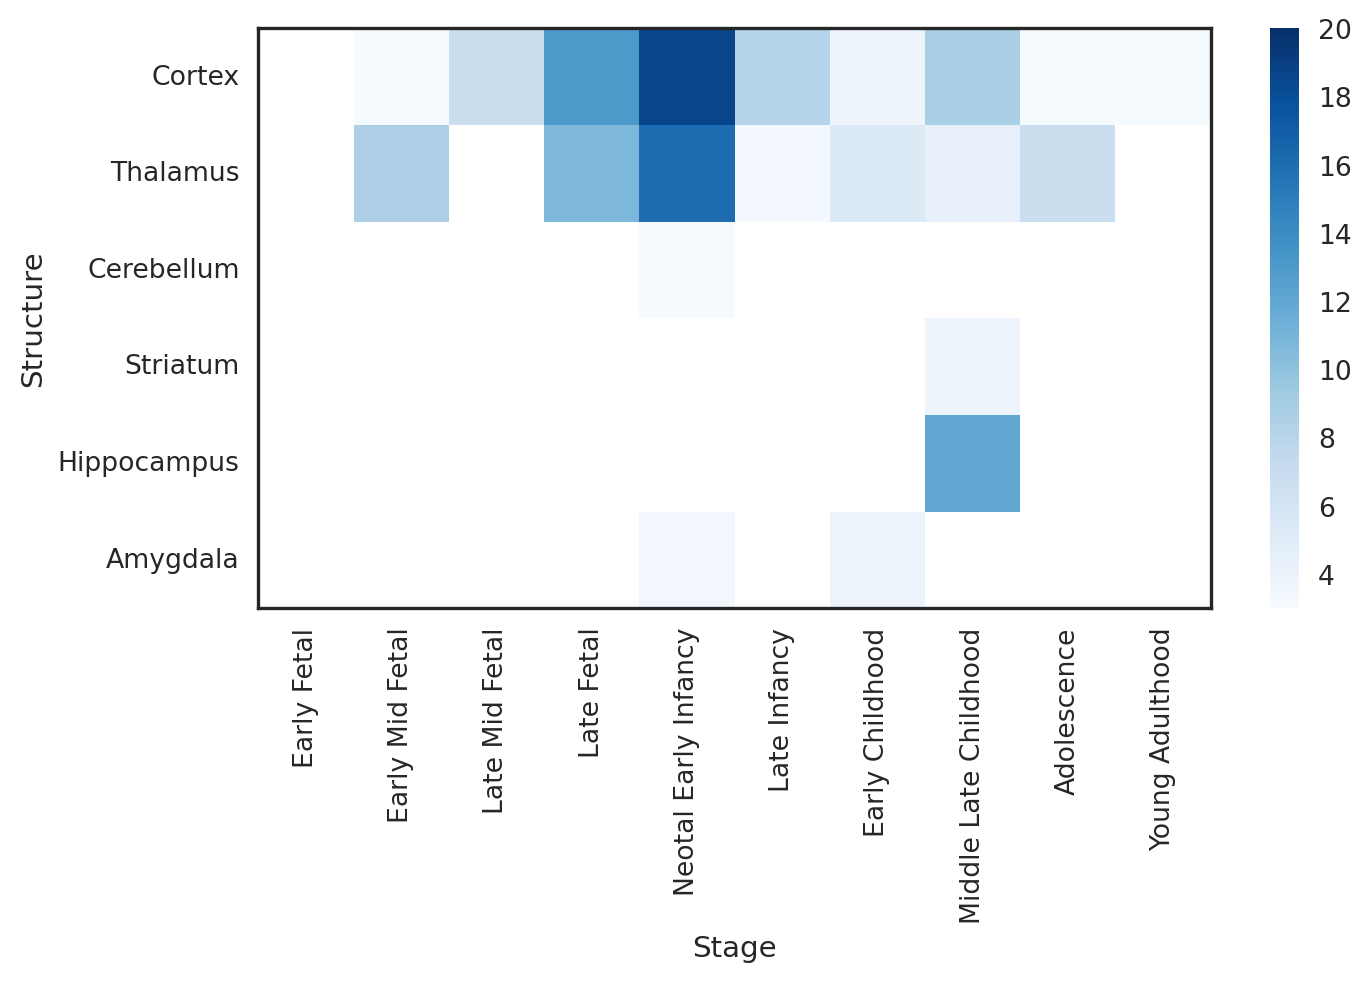

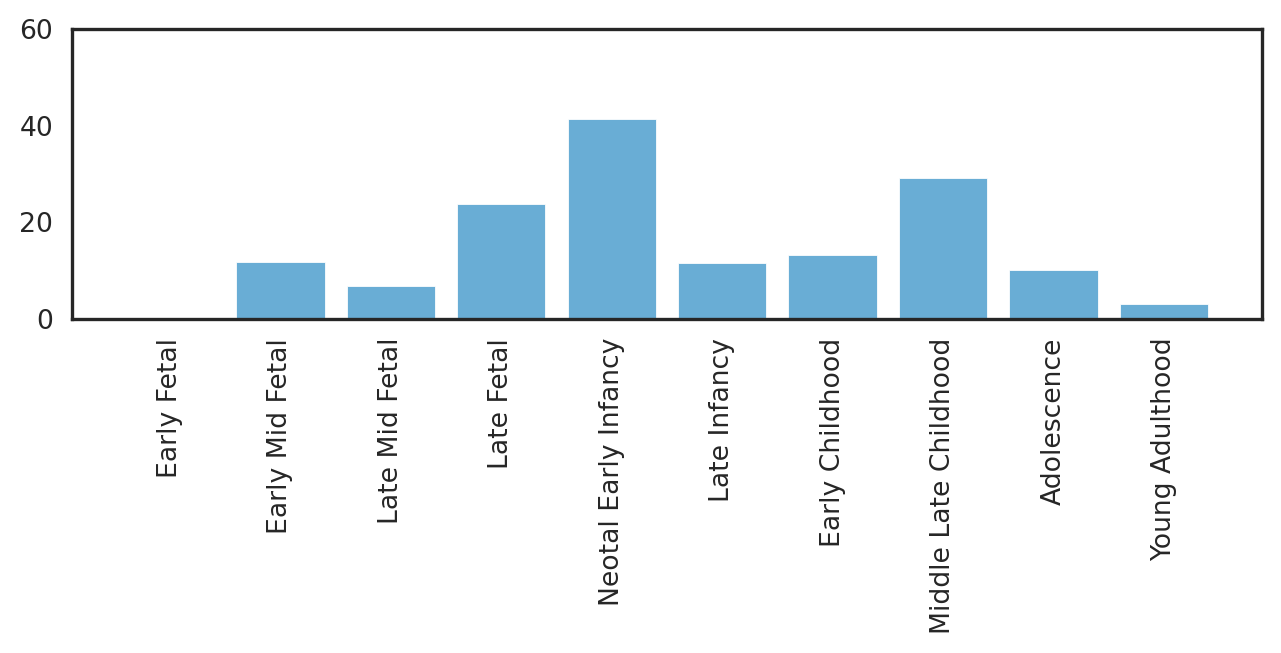

In [4]:
_ = helpers.run_csea_developmental(top_genes[0]['pos'], color='#69add5', cmap='Blues')

0 of 267 genes do not exist


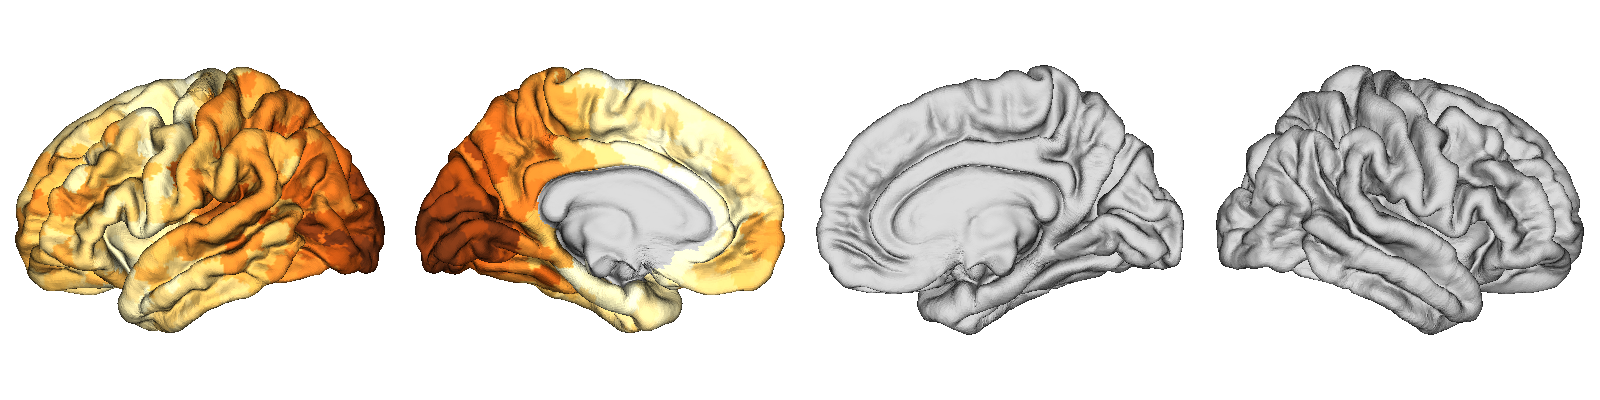

In [7]:
helpers.plot_surface(
    helpers.deparcellate(datasets.fetch_aggregate_gene_expression(top_genes[0]['neg'], 'sjh', ibf_threshold=0.5), 'sjh', space='fsaverage'),
    inflate=False, cmap='YlOrBr', plot_downsampled=False, space='fsaverage'
)

/home/asaberi/laminar_gradients/code/helpers.py:972: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(stages_order, rotation=90);


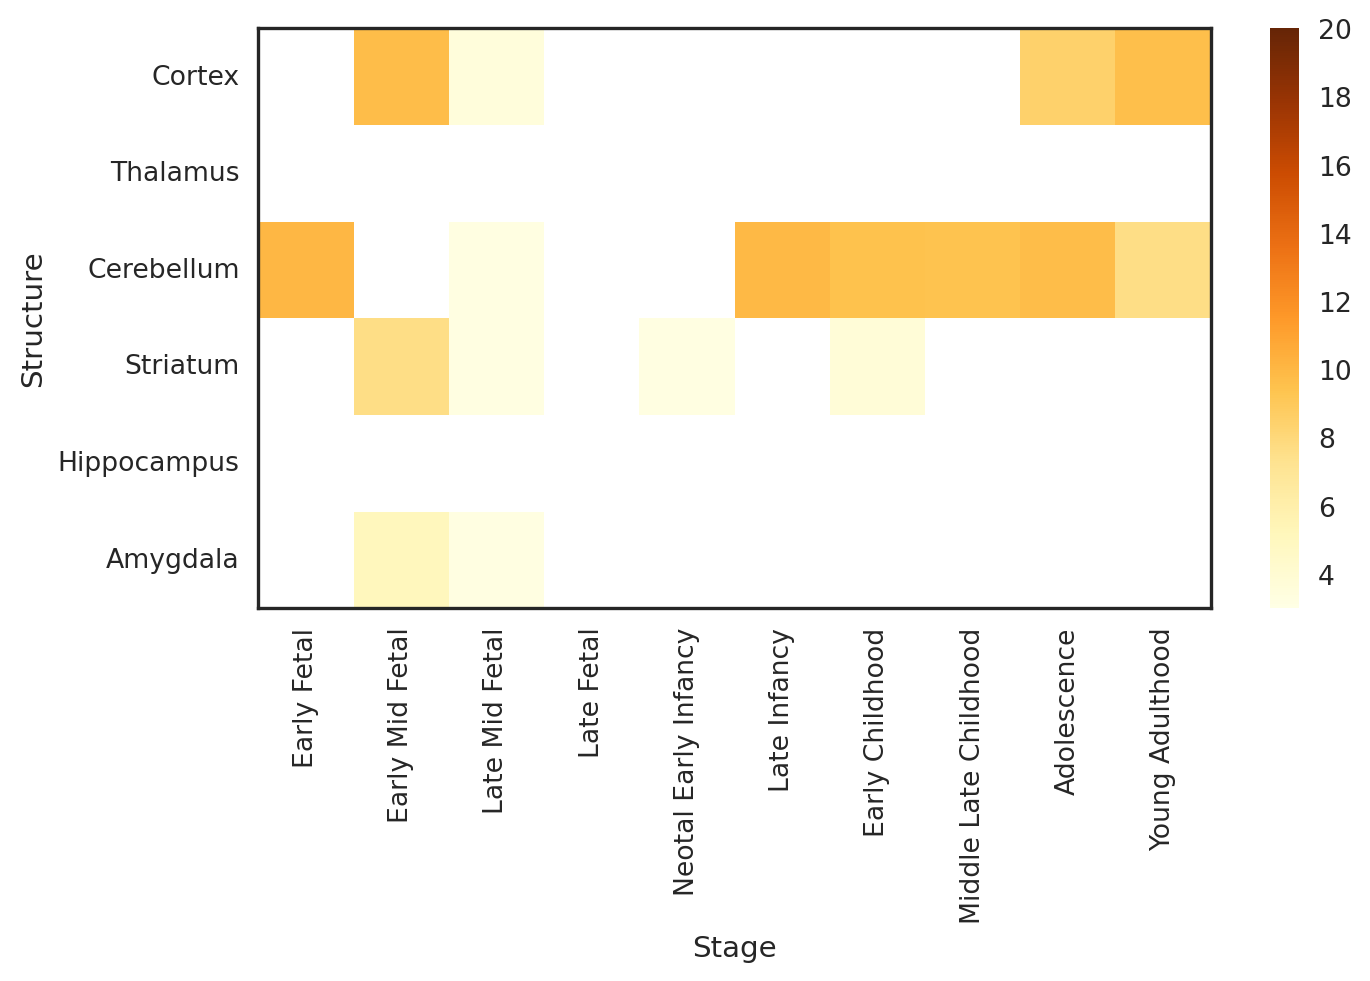

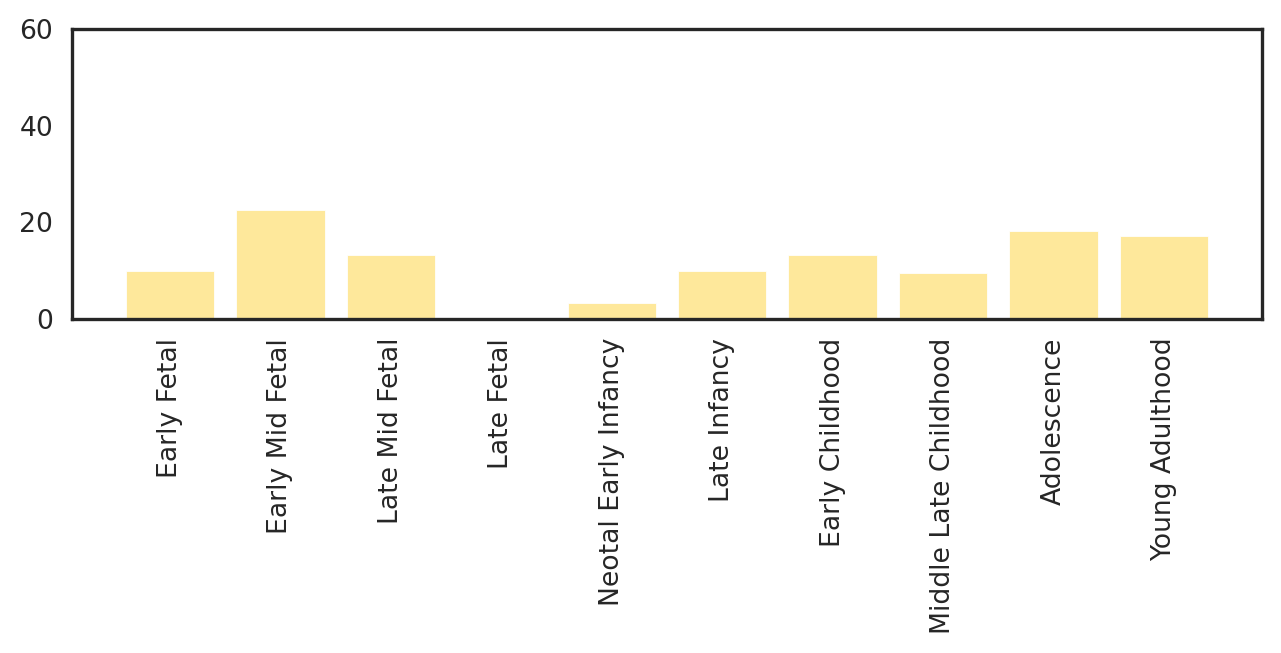

In [3]:
_ = helpers.run_csea_developmental(top_genes[0]['neg'], color='#fee89b', cmap='YlOrBr')